In [2]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(lsa)
library(rpart)
library(rpart.plot)
library(faraway)

In [3]:
# read datas
data_stat <- read.csv("nbastats/Stats.csv", header = TRUE, stringsAsFactors = FALSE, sep=",")
data_salary <- read.csv("nbastats/NBA_Salary.csv", header = TRUE, stringsAsFactors = FALSE, sep=",")

In [4]:
data_stat <- data.frame(data_stat)
data_salary <- data.frame(data_salary)

In [5]:
dim(data_stat)
dim(data_salary)

[1] 14658    50

[1] 12715     4

In [6]:
head(data_stat)

Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS.,⋯,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1991,Alaa Abdelnaby,PF,22,POR,43,0,290,13.1,0.499,⋯,0.568,27,62,89,12,4,12,22,39,135
1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,1505,12.2,0.448,⋯,0.857,34,87,121,206,55,4,110,149,942
1991,Mark Acres,C,28,ORL,68,0,1313,9.2,0.551,⋯,0.653,140,219,359,25,25,25,42,218,285
1991,Michael Adams,PG,28,DEN,66,66,2346,22.3,0.530,⋯,0.879,58,198,256,693,147,6,240,162,1752
1991,Mark Aguirre,SF,31,DET,78,13,2006,16.7,0.526,⋯,0.757,134,240,374,139,47,20,128,209,1104
1991,Danny Ainge,SG,31,POR,80,0,1710,17.0,0.574,⋯,0.826,45,160,205,285,63,13,100,195,890


In [7]:
colnames(data_salary)[1] <- "Year"
head(data_salary)

Year,Team,Player,Salary
2017,Atlanta Hawks,Dwight Howard,23180275
2017,Atlanta Hawks,Paul Millsap,20072033
2017,Atlanta Hawks,Kent Bazemore,15730338
2017,Atlanta Hawks,Tiago Splitter,8550000
2017,Atlanta Hawks,Kyle Korver,5239437
2017,Atlanta Hawks,Kris Humphries,4000000


In [8]:
summary(data_salary)

      Year          Team              Player             Salary         
 Min.   :1991   Length:12715       Length:12715       Length:12715      
 1st Qu.:1998   Class :character   Class :character   Class :character  
 Median :2005   Mode  :character   Mode  :character   Mode  :character  
 Mean   :2005                                                           
 3rd Qu.:2011                                                           
 Max.   :2017                                                           

In [9]:
summary(data_stat)

      Year         Player              Pos                 Age       
 Min.   :1991   Length:14658       Length:14658       Min.   :18.00  
 1st Qu.:1998   Class :character   Class :character   1st Qu.:24.00  
 Median :2005   Mode  :character   Mode  :character   Median :26.00  
 Mean   :2005                                         Mean   :26.99  
 3rd Qu.:2011                                         3rd Qu.:30.00  
 Max.   :2017                                         Max.   :44.00  
                                                                     
      Tm                  G               GS              MP      
 Length:14658       Min.   : 1.00   Min.   : 0.00   Min.   :   0  
 Class :character   1st Qu.:24.00   1st Qu.: 0.00   1st Qu.: 292  
 Mode  :character   Median :52.00   Median : 8.00   Median : 938  
                    Mean   :48.21   Mean   :23.05   Mean   :1128  
                    3rd Qu.:73.00   3rd Qu.:43.00   3rd Qu.:1831  
                    Max.   :85.00   Ma

In [10]:
# change the salary from character to number
data_salary$Salary <- as.numeric (data_salary$Salary)
# convert na to 0
data_salary[is.na(data_salary)] <- 0
is.numeric(data_salary$Salary)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

[1] TRUE

In [11]:
# change the salary by calculating the inflation rate
# convert all to 2017

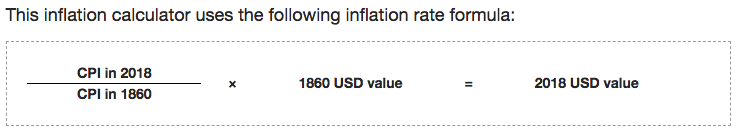

In [12]:
# create a data frame to store all the inflation index
year <- c (1991 : 2017)
cpi <- c (136.2, 140.3, 144.5, 148.2, 152.4, 156.9, 160.5, 163.0, 166.6, 172.2, 177.1, 179.9,
         184.0, 188.9, 195.3, 201.6, 207.3, 215.3, 214.5, 218.0, 225.0, 230.0, 233.2, 236.7, 
         237.9, 240.0, 245.1)
data_cpi <- data.frame (year, cpi)
head(data_cpi)

year,cpi
1991,136.2
1992,140.3
1993,144.5
1994,148.2
1995,152.4
1996,156.9


In [13]:
# Calculate
for (i in 1991:2017){
  x <- data_cpi[data_cpi$year == i,]$cpi
  data_salary[data_salary$Year == i,]$Salary <- data_salary[data_salary$Year == i,]$Salary * 245.1 / x
}
# convertion done

In [14]:
distinct(data_salary,Team)
distinct(data_stat,Tm)

Team
Atlanta Hawks
Boston Celtics
Brooklyn Nets
Charlotte Hornets
Chicago Bulls
Cleveland Cavaliers
Dallas Mavericks
Denver Nuggets
Detroit Pistons
Golden State Warriors


Tm
POR
DEN
ORL
DET
WSB
DAL
TOT
MIL
NJN
PHI


In [15]:
data_salary[data_salary$Team == 'Atlanta Hawks',]$Team <- 'ATL'
data_salary[data_salary$Team == 'Boston Celtics',]$Team <- 'BOS'
data_salary[data_salary$Team == 'Brooklyn Nets',]$Team <- 'BRK'
data_salary[data_salary$Team == 'Chicago Bulls',]$Team <- 'CHI'
data_salary[data_salary$Team == 'Cleveland Cavaliers',]$Team <- 'CLE'
data_salary[data_salary$Team == 'Dallas Mavericks',]$Team <- 'DAL'
data_salary[data_salary$Team == 'Denver Nuggets',]$Team <- 'DEN'
data_salary[data_salary$Team == 'Detroit Pistons',]$Team <- 'DET'
data_salary[data_salary$Team == 'Golden State Warriors',]$Team <- 'GSW'
data_salary[data_salary$Team == 'Houston Rockets',]$Team <- 'HOU'
data_salary[data_salary$Team == 'Indiana Pacers',]$Team <- 'IND'
data_salary[data_salary$Team == 'Los Angeles Clippers',]$Team <- 'LAC'
data_salary[data_salary$Team == 'Los Angeles Lakers',]$Team <- 'LAL'
data_salary[data_salary$Team == 'Memphis Grizzlies',]$Team <- 'MEM'
data_salary[data_salary$Team == 'Miami Heat',]$Team <- 'MIA'
data_salary[data_salary$Team == 'Milwaukee Bucks',]$Team <- 'MIL'
data_salary[data_salary$Team == 'Minnesota Timberwolves',]$Team <- 'MIN'
data_salary[data_salary$Team == 'New Jersey Nets',]$Team <- 'NJN'
data_salary[data_salary$Team == 'New York Knicks',]$Team <- 'NYK'
data_salary[data_salary$Team == 'Oklahoma City Thunder',]$Team <- 'OKC'
data_salary[data_salary$Team == 'Orlando Magic',]$Team <- 'ORL'
data_salary[data_salary$Team == 'Philadelphia 76ers',]$Team <- 'PHI'
data_salary[data_salary$Team == 'Phoenix Suns',]$Team <- 'PHO'
data_salary[data_salary$Team == 'Portland Trailblazers',]$Team <- 'POR'
data_salary[data_salary$Team == 'Sacramento Kings',]$Team <- 'SAC'
data_salary[data_salary$Team == 'San Antonio Spurs',]$Team <- 'SAS'
data_salary[data_salary$Team == 'Seattle SuperSonics',]$Team <- 'SEA'
data_salary[data_salary$Team == 'Toronto Raptors',]$Team <- 'TOR'
data_salary[data_salary$Team == 'Utah Jazz',]$Team <- 'UTA'
data_salary[data_salary$Team == 'Vancouver Grizzlies',]$Team <- 'VAN'
data_salary[data_salary$Team == 'Washington Bullets',]$Team <- 'WSB'
data_salary[data_salary$Team == 'Washington Wizards',]$Team <- 'WAS'

In [16]:
# Special teams with changed names
# Charlotte Hornets 
# (1991-2002) : CHH - Charlotte Hornets
# (2005-2014) : CHA - Charlotte Bobcats
# (2015-2017) : CHO - Charlotte Hornets
for (i in 1991:2002){
    data_salary[(data_salary$Team == 'Charlotte Hornets') & (data_salary$Year == i) ,]$Team <- 'CHH'
}
for (i in 2005:2014){
    data_salary[(data_salary$Team == 'Charlotte Bobcats') & (data_salary$Year == i) ,]$Team <- 'CHA'
}
for (i in 2015:2017){
    data_salary[(data_salary$Team == 'Charlotte Hornets') & (data_salary$Year == i) ,]$Team <- 'CHO'
}

In [17]:
# New Orleans Hornets 
# (2003-2005) : NOH - New Orleans Hornets
# (2006-2007) : NOK - New Orleans Hornets
# (2008-2013) : NOH - New Orleans Hornets
# (2014-2017) : NOP - New Orleans Pelicans
for (i in 2003:2005){
    data_salary[(data_salary$Team == 'New Orleans Hornets') & (data_salary$Year == i) ,]$Team <- 'NOH'
}
for (i in 2006:2007){
    data_salary[(data_salary$Team == 'New Orleans Hornets') & (data_salary$Year == i) ,]$Team <- 'NOK'
}
for (i in 2008:2013){
    data_salary[(data_salary$Team == 'New Orleans Hornets') & (data_salary$Year == i) ,]$Team <- 'NOH'
}
for (i in 2014:2017){
    data_salary[(data_salary$Team == 'New Orleans Pelicans') & (data_salary$Year == i) ,]$Team <- 'NOP'
}

In [18]:
colnames(data_stat)[5] <- "Team"
head(data_stat)

Year,Player,Pos,Age,Team,G,GS,MP,PER,TS.,⋯,FT.,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1991,Alaa Abdelnaby,PF,22,POR,43,0,290,13.1,0.499,⋯,0.568,27,62,89,12,4,12,22,39,135
1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,1505,12.2,0.448,⋯,0.857,34,87,121,206,55,4,110,149,942
1991,Mark Acres,C,28,ORL,68,0,1313,9.2,0.551,⋯,0.653,140,219,359,25,25,25,42,218,285
1991,Michael Adams,PG,28,DEN,66,66,2346,22.3,0.530,⋯,0.879,58,198,256,693,147,6,240,162,1752
1991,Mark Aguirre,SF,31,DET,78,13,2006,16.7,0.526,⋯,0.757,134,240,374,139,47,20,128,209,1104
1991,Danny Ainge,SG,31,POR,80,0,1710,17.0,0.574,⋯,0.826,45,160,205,285,63,13,100,195,890


In [19]:
# join in year, player and team
data_merged <- inner_join(data_stat, data_salary, by = c('Year','Player','Team'))

In [20]:
dim(data_merged)

[1] 11008    51

In [21]:
summary(data_merged)

      Year         Player              Pos                 Age       
 Min.   :1991   Length:11008       Length:11008       Min.   :18.00  
 1st Qu.:1999   Class :character   Class :character   1st Qu.:24.00  
 Median :2005   Mode  :character   Mode  :character   Median :26.00  
 Mean   :2005                                         Mean   :26.79  
 3rd Qu.:2012                                         3rd Qu.:30.00  
 Max.   :2017                                         Max.   :42.00  
                                                                     
     Team                 G               GS              MP      
 Length:11008       Min.   : 1.00   Min.   : 0.00   Min.   :   0  
 Class :character   1st Qu.:32.00   1st Qu.: 1.00   1st Qu.: 413  
 Mode  :character   Median :59.00   Median :11.00   Median :1138  
                    Mean   :52.68   Mean   :25.67   Mean   :1244  
                    3rd Qu.:76.00   3rd Qu.:50.00   3rd Qu.:1970  
                    Max.   :82.00   Ma

In [22]:
write.csv(data_merged, file = "MyData2.csv")

In [23]:
count = 0
for (i in 1:11008){
    for(j in 1:51){
        if(is.na(data_merged[i,j])){
                count = count +1
        }
    }
}
print(count)

[1] 2475


In [24]:
count_2 = 0
for (i in 1:11008){
    for(j in 1:5){
        if(is.na(data_merged[i,j])){
                count_2 = count_2 +1
        }
    }
}
print(count_2)
# no missing values in Year, player, pos, age, team

[1] 0


In [25]:
# all missing values are numeric, so assign it to 0
for (i in 1:11008){
    for(j in 1:51){
        if(is.na(data_merged[i,j])){
                data_merged[i,j] = 0
        }
    }
}
# see the result
count_3 = 0
for (i in 1:11008){
    for(j in 1:51){
        if(is.na(data_merged[i,j])){
                count_3 = count_3 +1
        }
    }
}
print(count_3)

[1] 0


In [26]:
head(data_merged)

Year,Player,Pos,Age,Team,G,GS,MP,PER,TS.,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
1991,Alaa Abdelnaby,PF,22,POR,43,0,290,13.1,0.499,⋯,27,62,89,12,4,12,22,39,135,710826.0
1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,1505,12.2,0.448,⋯,34,87,121,206,55,4,110,149,942,2987268.7
1991,Mark Acres,C,28,ORL,68,0,1313,9.2,0.551,⋯,140,219,359,25,25,25,42,218,285,786407.5
1991,Michael Adams,PG,28,DEN,66,66,2346,22.3,0.530,⋯,58,198,256,693,147,6,240,162,1752,1484636.6
1991,Mark Aguirre,SF,31,DET,78,13,2006,16.7,0.526,⋯,134,240,374,139,47,20,128,209,1104,2006508.8
1991,Danny Ainge,SG,31,POR,80,0,1710,17.0,0.574,⋯,45,160,205,285,63,13,100,195,890,1304680.6


In [27]:
# converting salary unit to k
data_merged$Salary = data_merged$Salary / 1000
head(data_merged)

Year,Player,Pos,Age,Team,G,GS,MP,PER,TS.,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
1991,Alaa Abdelnaby,PF,22,POR,43,0,290,13.1,0.499,⋯,27,62,89,12,4,12,22,39,135,710.8260
1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,1505,12.2,0.448,⋯,34,87,121,206,55,4,110,149,942,2987.2687
1991,Mark Acres,C,28,ORL,68,0,1313,9.2,0.551,⋯,140,219,359,25,25,25,42,218,285,786.4075
1991,Michael Adams,PG,28,DEN,66,66,2346,22.3,0.530,⋯,58,198,256,693,147,6,240,162,1752,1484.6366
1991,Mark Aguirre,SF,31,DET,78,13,2006,16.7,0.526,⋯,134,240,374,139,47,20,128,209,1104,2006.5088
1991,Danny Ainge,SG,31,POR,80,0,1710,17.0,0.574,⋯,45,160,205,285,63,13,100,195,890,1304.6806


In [28]:
# trunc the salary
data_merged$Salary <- trunc(data_merged$Salary)
head(data_merged)

Year,Player,Pos,Age,Team,G,GS,MP,PER,TS.,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
1991,Alaa Abdelnaby,PF,22,POR,43,0,290,13.1,0.499,⋯,27,62,89,12,4,12,22,39,135,710
1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,1505,12.2,0.448,⋯,34,87,121,206,55,4,110,149,942,2987
1991,Mark Acres,C,28,ORL,68,0,1313,9.2,0.551,⋯,140,219,359,25,25,25,42,218,285,786
1991,Michael Adams,PG,28,DEN,66,66,2346,22.3,0.530,⋯,58,198,256,693,147,6,240,162,1752,1484
1991,Mark Aguirre,SF,31,DET,78,13,2006,16.7,0.526,⋯,134,240,374,139,47,20,128,209,1104,2006
1991,Danny Ainge,SG,31,POR,80,0,1710,17.0,0.574,⋯,45,160,205,285,63,13,100,195,890,1304


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


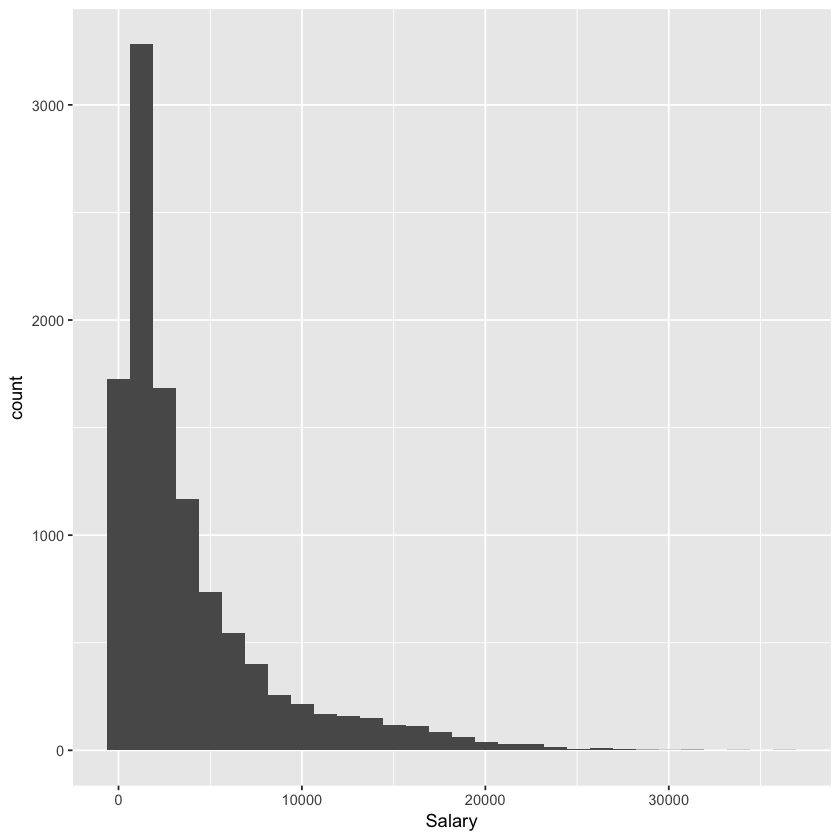

In [29]:
pl <- ggplot(data_merged,aes(x=Salary))+geom_histogram()
print(pl)

In [30]:
# shuffle the rows so that it won't be ordered in yaer
data_merged_shuffled <- data_merged[sample(1:nrow(data_merged)), ]
head(data_merged_shuffled)

,Year,Player,Pos,Age,Team,G,GS,MP,PER,TS.,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
10466,2016,Victor Oladipo,SG,23,ORL,72,52,2379,16.7,0.534,⋯,48,297,345,282,116,54,153,174,1153,5302
5790,2006,Stephen Jackson,SG,27,IND,81,81,2910,13.6,0.512,⋯,48,264,312,225,104,43,203,195,1329,6820
8630,2012,Hedo Turkoglu,SF,32,ORL,53,53,1653,11.7,0.528,⋯,24,175,199,233,45,17,142,139,576,11739
8358,2012,Jonny Flynn,PG,22,HOU,11,0,135,8.8,0.392,⋯,1,7,8,28,3,1,9,8,37,3638
5489,2005,Theo Ratliff,C,31,POR,63,45,1731,10.1,0.500,⋯,111,220,331,34,23,158,56,183,304,13726
9770,2015,Jeremy Evans,SF,27,UTA,38,0,266,20.5,0.636,⋯,26,45,71,13,11,12,5,29,90,1849


# Start to predict

## 1. By average: Use the average salaries in all the past seasons to predict
Criteria: Players with 3 or more seasons <br> 
Method: Averaging all the previous season salaries

In [30]:
head(data_merged)

Year,Player,Pos,Age,Team,G,GS,MP,PER,TS.,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
1991,Alaa Abdelnaby,PF,22,POR,43,0,290,13.1,0.499,⋯,27,62,89,12,4,12,22,39,135,710
1991,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,1505,12.2,0.448,⋯,34,87,121,206,55,4,110,149,942,2987
1991,Mark Acres,C,28,ORL,68,0,1313,9.2,0.551,⋯,140,219,359,25,25,25,42,218,285,786
1991,Michael Adams,PG,28,DEN,66,66,2346,22.3,0.530,⋯,58,198,256,693,147,6,240,162,1752,1484
1991,Mark Aguirre,SF,31,DET,78,13,2006,16.7,0.526,⋯,134,240,374,139,47,20,128,209,1104,2006
1991,Danny Ainge,SG,31,POR,80,0,1710,17.0,0.574,⋯,45,160,205,285,63,13,100,195,890,1304


In [31]:
# There are 2012 players in total since 1990
dim(distinct(data_merged,Player))

[1] 2012    1

## First let's see how their salaries compare the last season they played

In [32]:
# First sample players with two or more seasons
player_names <- distinct(data_merged,Player)
player_names <- unlist(player_names, use.names=FALSE)
is.vector(player_names)
player_names

[1] TRUE

[1] "Alaa Abdelnaby"           "Mahmoud Abdul-Rauf"      
   [3] "Mark Acres"               "Michael Adams"           
   [5] "Mark Aguirre"             "Danny Ainge"             
   [7] "Mark Alarie"              "Steve Alford"            
   [9] "Greg Anderson"            "Nick Anderson"           
  [11] "Ron Anderson"             "Willie Anderson"         
  [13] "Michael Ansley"           "B.J. Armstrong"          
  [15] "Keith Askins"             "Milos Babic"             
  [17] "Thurl Bailey"             "Ken Bannister"           
  [19] "Dana Barros"              "John Battle"             
  [21] "Kenny Battle"             "William Bedford"         
  [23] "Benoit Benjamin"          "Winston Bennett"         
  [25] "Rolando Blackman"         "Lance Blanks"            
  [27] "Mookie Blaylock"          "Muggsy Bogues"           
  [29] "Manute Bol"               "Sam Bowie"               
  [31] "Randy Breuer"             "Frank Brickowski"        
  [33] "Scott Brooks"             "Chucky Brown"            
  [35] "Dee Brown"                "Mike Brown"              
  [37] "Tony Brown"               "Mark Bryant"             
  [39] "Jud Buechler"             "Matt Bullard"            
  [41] "Willie Burton"            "Michael Cage"            
  [43] "Adrian Caldwell"          "Rick Calloway"           
  [45] "Elden Campbell"           "Tony Campbell"           
  [47] "Antoine Carr"             "Bill Cartwright"         
  [49] "Terry Catledge"           "Duane Causwell"          
  [51] "Cedric Ceballos"          "Tom Chambers"            
  [53] "Rex Chapman"              "Maurice Cheeks"          
  [55] "Derrick Chievous"         "Richard Coffey"          
  [57] "Derrick Coleman"          "Bimbo Coles"             
  [59] "Steve Colter"             "Lester Conner"           
  [61] "Anthony Cook"             "Wayne Cooper"            
  [63] "Tyrone Corbin"            "Dave Corzine"            
  [65] "Terry Cummings"           "Dell Curry"              
  [67] "Quintin Dailey"           "Brad Daugherty"          
  [69] "Brad Davis"               "Terry Davis"             
  [71] "Walter Davis"             "Johnny Dawkins"          
  [73] "Vlade Divac"              "James Donaldson"         
  [75] "Sherman Douglas"          "Greg Dreiling"           
  [77] "Larry Drew"               "Kevin Duckworth"         
  [79] "Chris Dudley"             "Ledell Eackles"          
  [81] "Mark Eaton"               "Blue Edwards"            
  [83] "James Edwards"            "Kevin Edwards"           
  [85] "Craig Ehlo"               "Mario Elie"              
  [87] "Sean Elliott"             "Dale Ellis"              
  [89] "Pervis Ellison"           "A.J. English"            
  [91] "Dave Feitl"               "Duane Ferrell"           
  [93] "Danny Ferry"              "Vern Fleming"            
  [95] "Sleepy Floyd"             "Greg Foster"             
  [97] "Anthony Frederick"        "Kevin Gamble"            
  [99] "Winston Garland"          "Tom Garrick"             
 [101] "Kenny Gattison"           "Tate George"             
 [103] "Derrick Gervin"           "Kendall Gill"            
 [105] "Armen Gilliam"            "Gerald Glass"            
 [107] "Mike Gminski"             "Jim Grandholm"           
 [109] "Gary Grant"               "Greg Grant"              
 [111] "Harvey Grant"             "Horace Grant"            
 [113] "Jeff Grayer"              "A.C. Green"              
 [115] "Rickey Green"             "Sidney Green"            
 [117] "Dave Greenwood"           "Darrell Griffith"        
 [119] "Scott Haffner"            "Jack Haley"              
 [121] "Tom Hammonds"             "Bob Hansen"              
 [123] "Tim Hardaway"             "Derek Harper"            
 [125] "Ron Harper"               "Scott Hastings"          
 [127] "Hersey Hawkins"           "Gerald Henderson"        
 [129] "Steve Henson"             "Rod Higgins"             
 [131] "Sean Higgins"             "Tyr

In [33]:
# choose players with 2 and over seasons
player_names_new <- c('')
for (i in player_names){
    if(nrow(data_merged[(data_merged$Player == i),]) >= 2){
        player_names_new <- append(player_names_new,data_merged[(data_merged$Player == i),]$Player)
    }
}

In [34]:
# done!
player_names_new <- player_names_new[-1]
player_names_new <- unique (player_names_new)
player_names_new
length(player_names_new)

[1] "Alaa Abdelnaby"           "Mahmoud Abdul-Rauf"      
   [3] "Mark Acres"               "Michael Adams"           
   [5] "Mark Aguirre"             "Danny Ainge"             
   [7] "Greg Anderson"            "Nick Anderson"           
   [9] "Ron Anderson"             "Willie Anderson"         
  [11] "B.J. Armstrong"           "Keith Askins"            
  [13] "Thurl Bailey"             "Dana Barros"             
  [15] "John Battle"              "Kenny Battle"            
  [17] "William Bedford"          "Benoit Benjamin"         
  [19] "Winston Bennett"          "Rolando Blackman"        
  [21] "Lance Blanks"             "Mookie Blaylock"         
  [23] "Muggsy Bogues"            "Manute Bol"              
  [25] "Sam Bowie"                "Randy Breuer"            
  [27] "Frank Brickowski"         "Scott Brooks"            
  [29] "Chucky Brown"             "Dee Brown"               
  [31] "Mike Brown"               "Tony Brown"              
  [33] "Mark Bryant"              "Jud Buechler"            
  [35] "Matt Bullard"             "Willie Burton"           
  [37] "Michael Cage"             "Adrian Caldwell"         
  [39] "Elden Campbell"           "Tony Campbell"           
  [41] "Antoine Carr"             "Bill Cartwright"         
  [43] "Terry Catledge"           "Duane Causwell"          
  [45] "Cedric Ceballos"          "Tom Chambers"            
  [47] "Rex Chapman"              "Maurice Cheeks"          
  [49] "Derrick Coleman"          "Bimbo Coles"             
  [51] "Steve Colter"             "Lester Conner"           
  [53] "Anthony Cook"             "Wayne Cooper"            
  [55] "Tyrone Corbin"            "Terry Cummings"          
  [57] "Dell Curry"               "Quintin Dailey"          
  [59] "Brad Daugherty"           "Brad Davis"              
  [61] "Terry Davis"              "Walter Davis"            
  [63] "Johnny Dawkins"           "Vlade Divac"             
  [65] "James Donaldson"          "Sherman Douglas"         
  [67] "Greg Dreiling"            "Larry Drew"              
  [69] "Kevin Duckworth"          "Chris Dudley"            
  [71] "Ledell Eackles"           "Mark Eaton"              
  [73] "Blue Edwards"             "James Edwards"           
  [75] "Kevin Edwards"            "Craig Ehlo"              
  [77] "Mario Elie"               "Sean Elliott"            
  [79] "Dale Ellis"               "Pervis Ellison"          
  [81] "A.J. English"             "Dave Feitl"              
  [83] "Duane Ferrell"            "Danny Ferry"             
  [85] "Vern Fleming"             "Sleepy Floyd"            
  [87] "Greg Foster"              "Anthony Frederick"       
  [89] "Kevin Gamble"             "Winston Garland"         
  [91] "Tom Garrick"              "Kenny Gattison"          
  [93] "Tate George"              "Kendall Gill"            
  [95] "Armen Gilliam"            "Gerald Glass"            
  [97] "Mike Gminski"             "Gary Grant"              
  [99] "Greg Grant"               "Harvey Grant"            
 [101] "Horace Grant"             "Jeff Grayer"             
 [103] "A.C. Green"               "Rickey Green"            
 [105] "Sidney Green"             "Jack Haley"              
 [107] "Tom Hammonds"             "Bob Hansen"              
 [109] "Tim Hardaway"             "Derek Harper"            
 [111] "Ron Harper"               "Scott Hastings"          
 [113] "Hersey Hawkins"           "Gerald Henderson"        
 [115] "Steve Henson"             "Rod Higgins"             
 [117] "Sean Higgins"             "Tyrone Hill"             
 [119] "Craig Hodges"             "Dave Hoppen"             
 [121] "Dennis Hopson"            "Jeff Hornacek"           
 [123] "Jay Humphries"            "Mark Jackson"            
 [125] "Dave Jamerson"            "Henry James"             
 [127] "Les Jepsen"               "Avery Johnson"           
 [129] "Buck Johnson"             "Eddie Johnson"           
 [131] "Kevin Johnson"            "Vin

[1] 1615

In [35]:
player_names_new <- player_names_new[!is.na(player_names_new)]
length(player_names_new)
is.vector(player_names_new)

[1] 1615

[1] TRUE

Get 1615 players

In [36]:
# 1615 players played 2 seasons or more in NBA
# calculate the average
total_sum = 0
for (x in player_names_new){
    # first get all the seaons he played
    year <- data_merged[(data_merged$Player == x),]$Year
    salary_0 <- data_merged[(data_merged$Player == x) & (data_merged$Year == year[1]),]$Salary
    salary_1 <- data_merged[(data_merged$Player == x) & (data_merged$Year == year[length(year)]),]$Salary
    avg_change = (salary_1 - salary_0) / (length(year)-1)
    avg_change = trunc(avg_change)
    total_sum = total_sum + avg_change[1]
}
total_avg = total_sum / 1615
print(total_avg)

[1] 304.6619


Overall, each NBA player earn 304k more than last season.

In [73]:
df_averaging <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging)[1] <- "realSalary"
colnames(df_averaging)[2] <- "predictedSalary"
df_averaging

realSalary,predictedSalary


In [74]:
# start to predict by averaing all the past seasons
for (x in player_names_new){
    # first get all the seaons he played
    year <- data_merged[(data_merged$Player == x),]$Year
    for (i in 1:(length(year)-1)){
        realSalary = data_merged[(data_merged$Player == x) & (data_merged$Year == year[i+1]) ,]$Salary
        predicted_sum = 0

        for (j in 1:i){
           predicted_sum = predicted_sum + data_merged[(data_merged$Player == x) & (data_merged$Year == year[j]),]$Salary
        }
 
        predictedSalary = trunc(predicted_sum / i)

        # add into data frame
        observation <- c(realSalary, predictedSalary)
        df_averaging <- rbind (df_averaging,observation)
    }
}

Warning message in predicted_sum + data_merged[(data_merged$Player == x) & (data_merged$Year == :
“longer object length is not a multiple of shorter object length”Warning message in predicted_sum + data_merged[(data_merged$Player == x) & (data_merged$Year == :
“longer object length is not a multiple of shorter object length”Warning message in predicted_sum + data_merged[(data_merged$Player == x) & (data_merged$Year == :
“longer object length is not a multiple of shorter object length”Warning message in predicted_sum + data_merged[(data_merged$Player == x) & (data_merged$Year == :
“longer object length is not a multiple of shorter object length”Warning message in predicted_sum + data_merged[(data_merged$Player == x) & (data_merged$Year == :
“longer object length is not a multiple of shorter object length”Warning message in predicted_sum + data_merged[(data_merged$Player == x) & (data_merged$Year == :
“longer object length is not a multiple of shorter object length”

In [75]:
dim(df_averaging)

[1] 8996    2

In [76]:
# remove NAs
df_averaging_filtered <- df_averaging %>% drop_na()

In [77]:
dim(df_averaging_filtered)
df_averaging_filtered

[1] 8996    2

X863,X710
863,710
848,786
1331,807
1045,938
3507,2987
3999,3247
3018,3497
3538,3377
4061,3409
4734,3518


In [78]:
# calculate mse and rmse
sum1 = 0
for(i in 1:nrow(df_averaging_filtered)){
    sum1 = sum1 + (df_averaging_filtered[i,1] - df_averaging_filtered[i,2]) * (df_averaging_filtered[i,1] - df_averaging_filtered[i,2])
}
mse1 = sum1 / nrow(df_averaging_filtered)
rmse1 <- sqrt(mse1)
mse1
rmse1

[1] 13231261

[1] 3637.48

## 2. By using the averaging salary of players with the same position and similar statistics

1. choose a player and year played <br>
2. find the player with the same position <br>
3. computing similarities based on some statistics <br>
4. find the most similar K players <br>
5. predicting by averaging

In [98]:
df_averaging_2_1991 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1991)[1] <- "realSalary"
colnames(df_averaging_2_1991)[2] <- "predictedSalary"
df_averaging_2_1991

realSalary,predictedSalary


In [99]:
# 1991
df_averaging_2_1991 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1991)[1] <- "realSalary"
colnames(df_averaging_2_1991)[2] <- "predictedSalary"  

stats_1991 <- subset(data_merged, Year == 1991)
stats_1991$index <- c(1:nrow(stats_1991))
player_names_1991 <- stats_1991$Player
for(x in player_names_1991){
    # get the position
    position <- stats_1991[(stats_1991$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_1991[(stats_1991$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_1991[stats_1991$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_1991_others <- player_names_1991[ - which(player_names_1991 %in% x)]
     for(y in player_names_1991_others){
         # get players with the same position
         if(stats_1991[stats_1991$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_1991[stats_1991$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_1991[stats_1991$Player == y,]$index,similarity,
                                stats_1991[stats_1991$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_1991 <- rbind(df_averaging_2_1991,Observation)
} 
colnames(df_averaging_2_1991)[1] <- "realSalary"
colnames(df_averaging_2_1991)[2] <- "predictedSalary"

In [100]:
dim(df_averaging_2_1991)   

[1] 315   2

In [101]:
# 1992
df_averaging_2_1992 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1992)[1] <- "realSalary"
colnames(df_averaging_2_1992)[2] <- "predictedSalary"  

stats_1992 <- subset(data_merged, Year == 1992)
stats_1992$index <- c(1:nrow(stats_1992))
player_names_1992 <- stats_1992$Player
for(x in player_names_1992){
    # get the position
    position <- stats_1992[(stats_1992$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_1992[(stats_1992$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_1992[stats_1992$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_1992_others <- player_names_1992[ - which(player_names_1992 %in% x)]
     for(y in player_names_1992_others){
         # get players with the same position
         if(stats_1992[stats_1992$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_1992[stats_1992$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_1992[stats_1992$Player == y,]$index,similarity,
                                stats_1992[stats_1992$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_1992 <- rbind(df_averaging_2_1992,Observation)
} 
colnames(df_averaging_2_1992)[1] <- "realSalary"
colnames(df_averaging_2_1992)[2] <- "predictedSalary"
dim(df_averaging_2_1992)

[1] 319   2

In [102]:
# 1993
df_averaging_2_1993 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1993)[1] <- "realSalary"
colnames(df_averaging_2_1993)[2] <- "predictedSalary"  

stats_1993 <- subset(data_merged, Year == 1993)
stats_1993$index <- c(1:nrow(stats_1993))
player_names_1993 <- stats_1993$Player
for(x in player_names_1993){
    # get the position
    position <- stats_1993[(stats_1993$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_1993[(stats_1993$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_1993[stats_1993$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_1993_others <- player_names_1993[ - which(player_names_1993 %in% x)]
     for(y in player_names_1993_others){
         # get players with the same position
         if(stats_1993[stats_1993$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_1993[stats_1993$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_1993[stats_1993$Player == y,]$index,similarity,
                                stats_1993[stats_1993$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_1993 <- rbind(df_averaging_2_1993,Observation)
} 
colnames(df_averaging_2_1993)[1] <- "realSalary"
colnames(df_averaging_2_1993)[2] <- "predictedSalary"
dim(df_averaging_2_1993)

[1] 326   2

In [103]:
# 1994
df_averaging_2_1994 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1994)[1] <- "realSalary"
colnames(df_averaging_2_1994)[2] <- "predictedSalary"  

stats_1994 <- subset(data_merged, Year == 1994)
stats_1994$index <- c(1:nrow(stats_1994))
player_names_1994 <- stats_1994$Player
for(x in player_names_1994){
    # get the position
    position <- stats_1994[(stats_1994$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_1994[(stats_1994$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_1994[stats_1994$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_1994_others <- player_names_1994[ - which(player_names_1994 %in% x)]
     for(y in player_names_1994_others){
         # get players with the same position
         if(stats_1994[stats_1994$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_1994[stats_1994$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_1994[stats_1994$Player == y,]$index,similarity,
                                stats_1994[stats_1994$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_1994 <- rbind(df_averaging_2_1994,Observation)
} 
colnames(df_averaging_2_1994)[1] <- "realSalary"
colnames(df_averaging_2_1994)[2] <- "predictedSalary"
dim(df_averaging_2_1994)

[1] 321   2

In [104]:
# 1995
# here I noticed some player's name appear more than once, so need to remove the duplicate
df_averaging_2_1995 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1995)[1] <- "realSalary"
colnames(df_averaging_2_1995)[2] <- "predictedSalary"  

stats_1995 <- subset(data_merged, Year == 1995)
stats_1995$index <- c(1:nrow(stats_1995))
player_names_1995 <- stats_1995$Player
stats_1995 <- stats_1995[!duplicated(stats_1995$Player),]

for(x in player_names_1995){
    # get the position
    position <- stats_1995[(stats_1995$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_1995[(stats_1995$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_1995[stats_1995$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_1995_others <- player_names_1995[ - which(player_names_1995 %in% x)]
     for(y in player_names_1995_others){
         # get players with the same position
         if(stats_1995[stats_1995$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_1995[stats_1995$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_1995[stats_1995$Player == y,]$index,similarity,
                                stats_1995[stats_1995$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_1995 <- rbind(df_averaging_2_1995,Observation)
} 
colnames(df_averaging_2_1995)[1] <- "realSalary"
colnames(df_averaging_2_1995)[2] <- "predictedSalary"
dim(df_averaging_2_1995)

[1] 351   2

In [105]:
# 1996
df_averaging_2_1996 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1996)[1] <- "realSalary"
colnames(df_averaging_2_1996)[2] <- "predictedSalary"  

stats_1996 <- subset(data_merged, Year == 1996)
stats_1996$index <- c(1:nrow(stats_1996))
player_names_1996 <- stats_1996$Player
stats_1996 <- stats_1996[!duplicated(stats_1996$Player),]

for(x in player_names_1996){
    # get the position
    position <- stats_1996[(stats_1996$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_1996[(stats_1996$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_1996[stats_1996$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_1996_others <- player_names_1996[ - which(player_names_1996 %in% x)]
     for(y in player_names_1996_others){
         # get players with the same position
         if(stats_1996[stats_1996$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_1996[stats_1996$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_1996[stats_1996$Player == y,]$index,similarity,
                                stats_1996[stats_1996$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_1996 <- rbind(df_averaging_2_1996,Observation)
} 
colnames(df_averaging_2_1996)[1] <- "realSalary"
colnames(df_averaging_2_1996)[2] <- "predictedSalary"
dim(df_averaging_2_1996)

[1] 381   2

In [106]:
# 1997
df_averaging_2_1997 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1997)[1] <- "realSalary"
colnames(df_averaging_2_1997)[2] <- "predictedSalary"  

stats_1997 <- subset(data_merged, Year == 1997)
stats_1997$index <- c(1:nrow(stats_1997))
player_names_1997 <- stats_1997$Player
stats_1997 <- stats_1997[!duplicated(stats_1997$Player),]

for(x in player_names_1997){
    # get the position
    position <- stats_1997[(stats_1997$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_1997[(stats_1997$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_1997[stats_1997$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_1997_others <- player_names_1997[ - which(player_names_1997 %in% x)]
     for(y in player_names_1997_others){
         # get players with the same position
         if(stats_1997[stats_1997$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_1997[stats_1997$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_1997[stats_1997$Player == y,]$index,similarity,
                                stats_1997[stats_1997$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_1997 <- rbind(df_averaging_2_1997,Observation)
} 
colnames(df_averaging_2_1997)[1] <- "realSalary"
colnames(df_averaging_2_1997)[2] <- "predictedSalary"
dim(df_averaging_2_1997)

[1] 366   2

In [107]:
# 1998
df_averaging_2_1998 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1998)[1] <- "realSalary"
colnames(df_averaging_2_1998)[2] <- "predictedSalary"  

stats_1998 <- subset(data_merged, Year == 1998)
stats_1998$index <- c(1:nrow(stats_1998))
player_names_1998 <- stats_1998$Player
for(x in player_names_1998){
    # get the position
    position <- stats_1998[(stats_1998$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_1998[(stats_1998$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_1998[stats_1998$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_1998_others <- player_names_1998[ - which(player_names_1998 %in% x)]
     for(y in player_names_1998_others){
         # get players with the same position
         if(stats_1998[stats_1998$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_1998[stats_1998$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_1998[stats_1998$Player == y,]$index,similarity,
                                stats_1998[stats_1998$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_1998 <- rbind(df_averaging_2_1998,Observation)
} 
colnames(df_averaging_2_1998)[1] <- "realSalary"
colnames(df_averaging_2_1998)[2] <- "predictedSalary"
dim(df_averaging_2_1998)

[1] 371   2

In [108]:
# 1999
df_averaging_2_1999 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_1999)[1] <- "realSalary"
colnames(df_averaging_2_1999)[2] <- "predictedSalary"  

stats_1999 <- subset(data_merged, Year == 1999)
stats_1999$index <- c(1:nrow(stats_1999))
player_names_1999 <- stats_1999$Player
stats_1999 <- stats_1999[!duplicated(stats_1999$Player),]

for(x in player_names_1999){
    # get the position
    position <- stats_1999[(stats_1999$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_1999[(stats_1999$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_1999[stats_1999$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_1999_others <- player_names_1999[ - which(player_names_1999 %in% x)]
     for(y in player_names_1999_others){
         # get players with the same position
         if(stats_1999[stats_1999$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_1999[stats_1999$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_1999[stats_1999$Player == y,]$index,similarity,
                                stats_1999[stats_1999$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_1999 <- rbind(df_averaging_2_1999,Observation)
} 
colnames(df_averaging_2_1999)[1] <- "realSalary"
colnames(df_averaging_2_1999)[2] <- "predictedSalary"
dim(df_averaging_2_1999)

[1] 399   2

In [109]:
# 2000
df_averaging_2_2000 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2000)[1] <- "realSalary"
colnames(df_averaging_2_2000)[2] <- "predictedSalary"  

stats_2000 <- subset(data_merged, Year == 2000)
stats_2000$index <- c(1:nrow(stats_2000))
player_names_2000 <- stats_2000$Player
stats_2000 <- stats_2000[!duplicated(stats_2000$Player),]

for(x in player_names_2000){
    # get the position
    position <- stats_2000[(stats_2000$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2000[(stats_2000$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2000[stats_2000$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2000_others <- player_names_2000[ - which(player_names_2000 %in% x)]
     for(y in player_names_2000_others){
         # get players with the same position
         if(stats_2000[stats_2000$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2000[stats_2000$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2000[stats_2000$Player == y,]$index,similarity,
                                stats_2000[stats_2000$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2000 <- rbind(df_averaging_2_2000,Observation)
} 
colnames(df_averaging_2_2000)[1] <- "realSalary"
colnames(df_averaging_2_2000)[2] <- "predictedSalary"
dim(df_averaging_2_2000)

[1] 409   2

In [110]:
# 2001
df_averaging_2_2001 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2001)[1] <- "realSalary"
colnames(df_averaging_2_2001)[2] <- "predictedSalary"  

stats_2001 <- subset(data_merged, Year == 2001)
stats_2001$index <- c(1:nrow(stats_2001))
player_names_2001 <- stats_2001$Player
stats_2001 <- stats_2001[!duplicated(stats_2001$Player),]

for(x in player_names_2001){
    # get the position
    position <- stats_2001[(stats_2001$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2001[(stats_2001$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2001[stats_2001$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2001_others <- player_names_2001[ - which(player_names_2001 %in% x)]
     for(y in player_names_2001_others){
         # get players with the same position
         if(stats_2001[stats_2001$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2001[stats_2001$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2001[stats_2001$Player == y,]$index,similarity,
                                stats_2001[stats_2001$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2001 <- rbind(df_averaging_2_2001,Observation)
} 
colnames(df_averaging_2_2001)[1] <- "realSalary"
colnames(df_averaging_2_2001)[2] <- "predictedSalary"
dim(df_averaging_2_2001)

[1] 400   2

In [111]:
# 2002
df_averaging_2_2002 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2002)[1] <- "realSalary"
colnames(df_averaging_2_2002)[2] <- "predictedSalary"  

stats_2002 <- subset(data_merged, Year == 2002)
stats_2002$index <- c(1:nrow(stats_2002))
player_names_2002 <- stats_2002$Player
stats_2002 <- stats_2002[!duplicated(stats_2002$Player),]

for(x in player_names_2002){
    # get the position
    position <- stats_2002[(stats_2002$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2002[(stats_2002$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2002[stats_2002$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2002_others <- player_names_2002[ - which(player_names_2002 %in% x)]
     for(y in player_names_2002_others){
         # get players with the same position
         if(stats_2002[stats_2002$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2002[stats_2002$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2002[stats_2002$Player == y,]$index,similarity,
                                stats_2002[stats_2002$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2002 <- rbind(df_averaging_2_2002,Observation)
} 
colnames(df_averaging_2_2002)[1] <- "realSalary"
colnames(df_averaging_2_2002)[2] <- "predictedSalary"
dim(df_averaging_2_2002)

[1] 402   2

In [112]:
# 2003
df_averaging_2_2003 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2003)[1] <- "realSalary"
colnames(df_averaging_2_2003)[2] <- "predictedSalary"  

stats_2003 <- subset(data_merged, Year == 2003)
stats_2003$index <- c(1:nrow(stats_2003))
player_names_2003 <- stats_2003$Player
stats_2003 <- stats_2003[!duplicated(stats_2003$Player),]

for(x in player_names_2003){
    # get the position
    position <- stats_2003[(stats_2003$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2003[(stats_2003$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2003[stats_2003$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2003_others <- player_names_2003[ - which(player_names_2003 %in% x)]
     for(y in player_names_2003_others){
         # get players with the same position
         if(stats_2003[stats_2003$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2003[stats_2003$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2003[stats_2003$Player == y,]$index,similarity,
                                stats_2003[stats_2003$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2003 <- rbind(df_averaging_2_2003,Observation)
} 
colnames(df_averaging_2_2003)[1] <- "realSalary"
colnames(df_averaging_2_2003)[2] <- "predictedSalary"
dim(df_averaging_2_2003)

[1] 401   2

In [113]:
# 2004
df_averaging_2_2004 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2004)[1] <- "realSalary"
colnames(df_averaging_2_2004)[2] <- "predictedSalary"  

stats_2004 <- subset(data_merged, Year == 2004)
stats_2004$index <- c(1:nrow(stats_2004))
player_names_2004 <- stats_2004$Player
stats_2004 <- stats_2004[!duplicated(stats_2004$Player),]

for(x in player_names_2004){
    # get the position
    position <- stats_2004[(stats_2004$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2004[(stats_2004$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2004[stats_2004$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2004_others <- player_names_2004[ - which(player_names_2004 %in% x)]
     for(y in player_names_2004_others){
         # get players with the same position
         if(stats_2004[stats_2004$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2004[stats_2004$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2004[stats_2004$Player == y,]$index,similarity,
                                stats_2004[stats_2004$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2004 <- rbind(df_averaging_2_2004,Observation)
} 
colnames(df_averaging_2_2004)[1] <- "realSalary"
colnames(df_averaging_2_2004)[2] <- "predictedSalary"
dim(df_averaging_2_2004)

[1] 405   2

In [114]:
# 2005
df_averaging_2_2005 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2005)[1] <- "realSalary"
colnames(df_averaging_2_2005)[2] <- "predictedSalary"  

stats_2005 <- subset(data_merged, Year == 2005)
stats_2005$index <- c(1:nrow(stats_2005))
player_names_2005 <- stats_2005$Player
stats_2005 <- stats_2005[!duplicated(stats_2005$Player),]

for(x in player_names_2005){
    # get the position
    position <- stats_2005[(stats_2005$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2005[(stats_2005$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2005[stats_2005$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2005_others <- player_names_2005[ - which(player_names_2005 %in% x)]
     for(y in player_names_2005_others){
         # get players with the same position
         if(stats_2005[stats_2005$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2005[stats_2005$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2005[stats_2005$Player == y,]$index,similarity,
                                stats_2005[stats_2005$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2005 <- rbind(df_averaging_2_2005,Observation)
} 
colnames(df_averaging_2_2005)[1] <- "realSalary"
colnames(df_averaging_2_2005)[2] <- "predictedSalary"
dim(df_averaging_2_2005)

[1] 426   2

In [115]:
# 2006
df_averaging_2_2006 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2006)[1] <- "realSalary"
colnames(df_averaging_2_2006)[2] <- "predictedSalary"  

stats_2006 <- subset(data_merged, Year == 2006)
stats_2006$index <- c(1:nrow(stats_2006))
player_names_2006 <- stats_2006$Player
stats_2006 <- stats_2006[!duplicated(stats_2006$Player),]

for(x in player_names_2006){
    # get the position
    position <- stats_2006[(stats_2006$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2006[(stats_2006$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2006[stats_2006$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2006_others <- player_names_2006[ - which(player_names_2006 %in% x)]
     for(y in player_names_2006_others){
         # get players with the same position
         if(stats_2006[stats_2006$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2006[stats_2006$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2006[stats_2006$Player == y,]$index,similarity,
                                stats_2006[stats_2006$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2006 <- rbind(df_averaging_2_2006,Observation)
} 
colnames(df_averaging_2_2006)[1] <- "realSalary"
colnames(df_averaging_2_2006)[2] <- "predictedSalary"
dim(df_averaging_2_2006)

[1] 436   2

In [116]:
# 2007
df_averaging_2_2007 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2007)[1] <- "realSalary"
colnames(df_averaging_2_2007)[2] <- "predictedSalary"  

stats_2007 <- subset(data_merged, Year == 2007)
stats_2007$index <- c(1:nrow(stats_2007))
player_names_2007 <- stats_2007$Player
stats_2007 <- stats_2007[!duplicated(stats_2007$Player),]

for(x in player_names_2007){
    # get the position
    position <- stats_2007[(stats_2007$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2007[(stats_2007$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2007[stats_2007$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2007_others <- player_names_2007[ - which(player_names_2007 %in% x)]
     for(y in player_names_2007_others){
         # get players with the same position
         if(stats_2007[stats_2007$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2007[stats_2007$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2007[stats_2007$Player == y,]$index,similarity,
                                stats_2007[stats_2007$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2007 <- rbind(df_averaging_2_2007,Observation)
} 
colnames(df_averaging_2_2007)[1] <- "realSalary"
colnames(df_averaging_2_2007)[2] <- "predictedSalary"
dim(df_averaging_2_2007)

[1] 447   2

In [117]:
# 2008
df_averaging_2_2008 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2008)[1] <- "realSalary"
colnames(df_averaging_2_2008)[2] <- "predictedSalary"  

stats_2008 <- subset(data_merged, Year == 2008)
stats_2008$index <- c(1:nrow(stats_2008))
player_names_2008 <- stats_2008$Player
stats_2008 <- stats_2008[!duplicated(stats_2008$Player),]

for(x in player_names_2008){
    # get the position
    position <- stats_2008[(stats_2008$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2008[(stats_2008$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2008[stats_2008$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2008_others <- player_names_2008[ - which(player_names_2008 %in% x)]
     for(y in player_names_2008_others){
         # get players with the same position
         if(stats_2008[stats_2008$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2008[stats_2008$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2008[stats_2008$Player == y,]$index,similarity,
                                stats_2008[stats_2008$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2008 <- rbind(df_averaging_2_2008,Observation)
} 
colnames(df_averaging_2_2008)[1] <- "realSalary"
colnames(df_averaging_2_2008)[2] <- "predictedSalary"
dim(df_averaging_2_2008)

[1] 438   2

In [118]:
# 2009
df_averaging_2_2009 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2009)[1] <- "realSalary"
colnames(df_averaging_2_2009)[2] <- "predictedSalary"  

stats_2009 <- subset(data_merged, Year == 2009)
stats_2009$index <- c(1:nrow(stats_2009))
player_names_2009 <- stats_2009$Player
stats_2009 <- stats_2009[!duplicated(stats_2009$Player),]

for(x in player_names_2009){
    # get the position
    position <- stats_2009[(stats_2009$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2009[(stats_2009$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2009[stats_2009$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2009_others <- player_names_2009[ - which(player_names_2009 %in% x)]
     for(y in player_names_2009_others){
         # get players with the same position
         if(stats_2009[stats_2009$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2009[stats_2009$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2009[stats_2009$Player == y,]$index,similarity,
                                stats_2009[stats_2009$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2009 <- rbind(df_averaging_2_2009,Observation)
} 
colnames(df_averaging_2_2009)[1] <- "realSalary"
colnames(df_averaging_2_2009)[2] <- "predictedSalary"
dim(df_averaging_2_2009)

[1] 430   2

In [119]:
# 2010
df_averaging_2_2010 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2010)[1] <- "realSalary"
colnames(df_averaging_2_2010)[2] <- "predictedSalary"  

stats_2010 <- subset(data_merged, Year == 2010)
stats_2010$index <- c(1:nrow(stats_2010))
player_names_2010 <- stats_2010$Player
stats_2010 <- stats_2010[!duplicated(stats_2010$Player),]

for(x in player_names_2010){
    # get the position
    position <- stats_2010[(stats_2010$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2010[(stats_2010$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2010[stats_2010$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2010_others <- player_names_2010[ - which(player_names_2010 %in% x)]
     for(y in player_names_2010_others){
         # get players with the same position
         if(stats_2010[stats_2010$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2010[stats_2010$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2010[stats_2010$Player == y,]$index,similarity,
                                stats_2010[stats_2010$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2010 <- rbind(df_averaging_2_2010,Observation)
} 
colnames(df_averaging_2_2010)[1] <- "realSalary"
colnames(df_averaging_2_2010)[2] <- "predictedSalary"
dim(df_averaging_2_2010)

[1] 434   2

In [120]:
# 2011
df_averaging_2_2011 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2011)[1] <- "realSalary"
colnames(df_averaging_2_2011)[2] <- "predictedSalary"  

stats_2011 <- subset(data_merged, Year == 2011)
stats_2011$index <- c(1:nrow(stats_2011))
player_names_2011 <- stats_2011$Player
stats_2011 <- stats_2011[!duplicated(stats_2011$Player),]

for(x in player_names_2011){
    # get the position
    position <- stats_2011[(stats_2011$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2011[(stats_2011$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2011[stats_2011$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2011_others <- player_names_2011[ - which(player_names_2011 %in% x)]
     for(y in player_names_2011_others){
         # get players with the same position
         if(stats_2011[stats_2011$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2011[stats_2011$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2011[stats_2011$Player == y,]$index,similarity,
                                stats_2011[stats_2011$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2011 <- rbind(df_averaging_2_2011,Observation)
} 
colnames(df_averaging_2_2011)[1] <- "realSalary"
colnames(df_averaging_2_2011)[2] <- "predictedSalary"
dim(df_averaging_2_2011)

[1] 444   2

In [121]:
# 2012
df_averaging_2_2012 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2012)[1] <- "realSalary"
colnames(df_averaging_2_2012)[2] <- "predictedSalary"  

stats_2012 <- subset(data_merged, Year == 2012)
stats_2012$index <- c(1:nrow(stats_2012))
player_names_2012 <- stats_2012$Player
stats_2012 <- stats_2012[!duplicated(stats_2012$Player),]

for(x in player_names_2012){
    # get the position
    position <- stats_2012[(stats_2012$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2012[(stats_2012$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2012[stats_2012$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2012_others <- player_names_2012[ - which(player_names_2012 %in% x)]
     for(y in player_names_2012_others){
         # get players with the same position
         if(stats_2012[stats_2012$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2012[stats_2012$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2012[stats_2012$Player == y,]$index,similarity,
                                stats_2012[stats_2012$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2012 <- rbind(df_averaging_2_2012,Observation)
} 
colnames(df_averaging_2_2012)[1] <- "realSalary"
colnames(df_averaging_2_2012)[2] <- "predictedSalary"
dim(df_averaging_2_2012)

[1] 456   2

In [122]:
# 2013
df_averaging_2_2013 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2013)[1] <- "realSalary"
colnames(df_averaging_2_2013)[2] <- "predictedSalary"  

stats_2013 <- subset(data_merged, Year == 2013)
stats_2013$index <- c(1:nrow(stats_2013))
player_names_2013 <- stats_2013$Player
stats_2013 <- stats_2013[!duplicated(stats_2013$Player),]

for(x in player_names_2013){
    # get the position
    position <- stats_2013[(stats_2013$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2013[(stats_2013$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2013[stats_2013$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2013_others <- player_names_2013[ - which(player_names_2013 %in% x)]
     for(y in player_names_2013_others){
         # get players with the same position
         if(stats_2013[stats_2013$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2013[stats_2013$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2013[stats_2013$Player == y,]$index,similarity,
                                stats_2013[stats_2013$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2013 <- rbind(df_averaging_2_2013,Observation)
} 
colnames(df_averaging_2_2013)[1] <- "realSalary"
colnames(df_averaging_2_2013)[2] <- "predictedSalary"
dim(df_averaging_2_2013)

[1] 455   2

In [123]:
# 2014
df_averaging_2_2014 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2014)[1] <- "realSalary"
colnames(df_averaging_2_2014)[2] <- "predictedSalary"  

stats_2014 <- subset(data_merged, Year == 2014)
stats_2014$index <- c(1:nrow(stats_2014))
player_names_2014 <- stats_2014$Player
stats_2014 <- stats_2014[!duplicated(stats_2014$Player),]

for(x in player_names_2014){
    # get the position
    position <- stats_2014[(stats_2014$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2014[(stats_2014$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2014[stats_2014$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2014_others <- player_names_2014[ - which(player_names_2014 %in% x)]
     for(y in player_names_2014_others){
         # get players with the same position
         if(stats_2014[stats_2014$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2014[stats_2014$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2014[stats_2014$Player == y,]$index,similarity,
                                stats_2014[stats_2014$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2014 <- rbind(df_averaging_2_2014,Observation)
} 
colnames(df_averaging_2_2014)[1] <- "realSalary"
colnames(df_averaging_2_2014)[2] <- "predictedSalary"
dim(df_averaging_2_2014)

[1] 493   2

In [124]:
# 2015
df_averaging_2_2015 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2015)[1] <- "realSalary"
colnames(df_averaging_2_2015)[2] <- "predictedSalary"  

stats_2015 <- subset(data_merged, Year == 2015)
stats_2015$index <- c(1:nrow(stats_2015))
player_names_2015 <- stats_2015$Player
stats_2015 <- stats_2015[!duplicated(stats_2015$Player),]

for(x in player_names_2015){
    # get the position
    position <- stats_2015[(stats_2015$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2015[(stats_2015$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2015[stats_2015$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2015_others <- player_names_2015[ - which(player_names_2015 %in% x)]
     for(y in player_names_2015_others){
         # get players with the same position
         if(stats_2015[stats_2015$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2015[stats_2015$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2015[stats_2015$Player == y,]$index,similarity,
                                stats_2015[stats_2015$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2015 <- rbind(df_averaging_2_2015,Observation)
} 
colnames(df_averaging_2_2015)[1] <- "realSalary"
colnames(df_averaging_2_2015)[2] <- "predictedSalary"
dim(df_averaging_2_2015)

[1] 495   2

In [125]:
# 2016
df_averaging_2_2016 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2016)[1] <- "realSalary"
colnames(df_averaging_2_2016)[2] <- "predictedSalary"  

stats_2016 <- subset(data_merged, Year == 2016)
stats_2016$index <- c(1:nrow(stats_2016))
player_names_2016 <- stats_2016$Player
stats_2016 <- stats_2016[!duplicated(stats_2016$Player),]

for(x in player_names_2016){
    # get the position
    position <- stats_2016[(stats_2016$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2016[(stats_2016$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2016[stats_2016$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2016_others <- player_names_2016[ - which(player_names_2016 %in% x)]
     for(y in player_names_2016_others){
         # get players with the same position
         if(stats_2016[stats_2016$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2016[stats_2016$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2016[stats_2016$Player == y,]$index,similarity,
                                stats_2016[stats_2016$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2016 <- rbind(df_averaging_2_2016,Observation)
} 
colnames(df_averaging_2_2016)[1] <- "realSalary"
colnames(df_averaging_2_2016)[2] <- "predictedSalary"
dim(df_averaging_2_2016)

[1] 485   2

In [126]:
# 2017
df_averaging_2_2017 <- data.frame(matrix(ncol = 2, nrow = 0))
colnames(df_averaging_2_2017)[1] <- "realSalary"
colnames(df_averaging_2_2017)[2] <- "predictedSalary"  

stats_2017 <- subset(data_merged, Year == 2017)
stats_2017$index <- c(1:nrow(stats_2017))
player_names_2017 <- stats_2017$Player
stats_2017 <- stats_2017[!duplicated(stats_2017$Player),]

for(x in player_names_2017){
    # get the position
    position <- stats_2017[(stats_2017$Player == x),]$Pos
    
    # write real salary
    realSalary <- stats_2017[(stats_2017$Player == x),]$Salary
    
    # computing similarities
    # creating a data frame to store similarity
    df_similarity <- data.frame(matrix(ncol = 3, nrow = 0))
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    
    this_stat <- as.vector(stats_2017[stats_2017$Player == x,6:50])
    this_stat <- unlist(this_stat, use.names=FALSE)
    
    # get other players
    player_names_2017_others <- player_names_2017[ - which(player_names_2017 %in% x)]
     for(y in player_names_2017_others){
         # get players with the same position
         if(stats_2017[stats_2017$Player == y,]$Pos == position){
                other_stat <- as.vector(stats_2017[stats_2017$Player == y,6:50])
                other_stat <- unlist(other_stat, use.names=FALSE)
                 
                # computing
                similarity <- cosine(this_stat,other_stat)
                # write into data frame
                observation <- c(stats_2017[stats_2017$Player == y,]$index,similarity,
                                stats_2017[stats_2017$Player == y,]$Salary)
                df_similarity <- rbind(df_similarity,observation)
         }
    }
   
    # write predicted salary
    # sort
    colnames(df_similarity)[1] <- "row index"
    colnames(df_similarity)[2] <- "similarity"
    colnames(df_similarity)[3] <- "salary"
    df_similarity_sorted <- arrange(df_similarity,desc(similarity))
    df_similarity_top <- df_similarity_sorted[1:10,]
    predictedSalary <- trunc(sum(df_similarity_top$salary)/10)
    
    Observation <- c(realSalary,predictedSalary)
    df_averaging_2_2017 <- rbind(df_averaging_2_2017,Observation)
} 
colnames(df_averaging_2_2017)[1] <- "realSalary"
colnames(df_averaging_2_2017)[2] <- "predictedSalary"
dim(df_averaging_2_2017)

[1] 403   2

In [127]:
data_averaging_2 <- rbind(df_averaging_2_1991,df_averaging_2_1992)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_1993)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_1994)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_1995)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_1996)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_1997)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_1998)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_1999)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2000)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2001)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2002)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2003)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2004)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2005)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2006)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2007)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2008)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2009)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2010)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2011)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2012)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2013)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2014)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2015)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2016)
data_averaging_2 <- rbind(data_averaging_2,df_averaging_2_2017)
dim(data_averaging_2)

[1] 11008     2

In [128]:
data_averaging_2

realSalary,predictedSalary
710,1105
2987,1251
786,1668
1484,1758
2006,2120
1304,1471
899,1465
449,1587
2456,1301
1304,1453


In [129]:
# calculate MSE and RMSE
sum2 = 0
for(i in 1:nrow(data_averaging_2)){
    sum2 = sum2 + (data_averaging_2[i,1] - data_averaging_2[i,2]) * (data_averaging_2[i,1] - data_averaging_2[i,2])
}
mse2 = sum2 / nrow(data_averaging_2)
rmse2 <- sqrt(mse2)
mse2
rmse2

[1] 13830723

[1] 3718.968

## 3. By multiple linear regression

In [33]:
dim(data_merged_shuffled)
head(data_merged_shuffled)
colnames(data_merged_shuffled)

[1] 11008    51

,Year,Player,Pos,Age,Team,G,GS,MP,PER,TS.,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
10466,2016,Victor Oladipo,SG,23,ORL,72,52,2379,16.7,0.534,⋯,48,297,345,282,116,54,153,174,1153,5302
5790,2006,Stephen Jackson,SG,27,IND,81,81,2910,13.6,0.512,⋯,48,264,312,225,104,43,203,195,1329,6820
8630,2012,Hedo Turkoglu,SF,32,ORL,53,53,1653,11.7,0.528,⋯,24,175,199,233,45,17,142,139,576,11739
8358,2012,Jonny Flynn,PG,22,HOU,11,0,135,8.8,0.392,⋯,1,7,8,28,3,1,9,8,37,3638
5489,2005,Theo Ratliff,C,31,POR,63,45,1731,10.1,0.500,⋯,111,220,331,34,23,158,56,183,304,13726
9770,2015,Jeremy Evans,SF,27,UTA,38,0,266,20.5,0.636,⋯,26,45,71,13,11,12,5,29,90,1849


[1] "Year"   "Player" "Pos"    "Age"    "Team"   "G"      "GS"     "MP"    
 [9] "PER"    "TS."    "X3PAr"  "FTr"    "ORB."   "DRB."   "TRB."   "AST."  
[17] "STL."   "BLK."   "TOV."   "USG."   "OWS"    "DWS"    "WS"     "WS.48" 
[25] "OBPM"   "DBPM"   "BPM"    "VORP"   "FG"     "FGA"    "FG."    "X3P"   
[33] "X3PA"   "X3P."   "X2P"    "X2PA"   "X2P."   "eFG."   "FT"     "FTA"   
[41] "FT."    "ORB"    "DRB"    "TRB"    "AST"    "STL"    "BLK"    "TOV"   
[49] "PF"     "PTS"    "Salary"

In [35]:
data_merged_shuffled <- data_merged_shuffled[,-c(1,2,3,5)]
head(data_merged_shuffled)

,Age,G,GS,MP,PER,TS.,X3PAr,FTr,ORB.,DRB.,⋯,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
10466,23,72,52,2379,16.7,0.534,0.291,0.255,2.2,14.0,⋯,48,297,345,282,116,54,153,174,1153,5302
5790,27,81,81,2910,13.6,0.512,0.295,0.297,2.0,10.1,⋯,48,264,312,225,104,43,203,195,1329,6820
8630,32,53,53,1653,11.7,0.528,0.512,0.188,1.7,12.4,⋯,24,175,199,233,45,17,142,139,576,11739
8358,22,11,0,135,8.8,0.392,0.220,0.341,0.9,6.1,⋯,1,7,8,28,3,1,9,8,37,3638
5489,31,63,45,1731,10.1,0.500,0.000,0.416,7.7,14.1,⋯,111,220,331,34,23,158,56,183,304,13726
9770,27,38,0,266,20.5,0.636,0.086,0.500,11.3,19.4,⋯,26,45,71,13,11,12,5,29,90,1849


In [36]:
set.seed(111)
trainingRowIndex <- sample(1:nrow(data_merged_shuffled), 0.8*nrow(data_merged_shuffled)) 
trainingData <- data_merged_shuffled[trainingRowIndex, ] 
testData <- data_merged_shuffled[-trainingRowIndex, ]

In [37]:
m1 <- lm(Salary ~. -TRB. -WS -WS.48 -BPM -TRB -AST -STL -BLK -TOV , data = trainingData )
summary(m1)


Call:
lm(formula = Salary ~ . - TRB. - WS - WS.48 - BPM - TRB - AST - 
    STL - BLK - TOV, data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-15365.6  -1927.4   -423.8   1287.3  24088.7 

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5754.3317   547.8231 -10.504  < 2e-16 ***
Age           276.5132     9.1347  30.271  < 2e-16 ***
G             -28.5411     3.9055  -7.308 2.95e-13 ***
GS             25.5947     2.7941   9.160  < 2e-16 ***
MP             -1.1115     0.2537  -4.382 1.19e-05 ***
PER            37.6387    31.2135   1.206 0.227909    
TS.         -6101.3537  1686.9208  -3.617 0.000300 ***
X3PAr         177.4978   761.9857   0.233 0.815813    
FTr           216.9007   204.7947   1.059 0.289578    
ORB.          -43.8885    14.1836  -3.094 0.001979 ** 
DRB.           15.0303    12.4134   1.211 0.225997    
AST.           11.8177     6.7855   1.742 0.081612 .  
STL.       

In [46]:
# variable selection based on AIC
m2 <- step(m1)

Start:  AIC=142825.4
Salary ~ (Age + G + GS + MP + PER + TS. + X3PAr + FTr + ORB. + 
    DRB. + TRB. + AST. + STL. + BLK. + TOV. + USG. + OWS + DWS + 
    WS + WS.48 + OBPM + DBPM + BPM + VORP + FG + FGA + FG. + 
    X3P + X3PA + X3P. + X2P + X2PA + X2P. + eFG. + FT + FTA + 
    FT. + ORB + DRB + TRB + AST + STL + BLK + TOV + PF + PTS) - 
    TRB. - WS - WS.48 - BPM - TRB - AST - STL - BLK - TOV


Step:  AIC=142825.4
Salary ~ Age + G + GS + MP + PER + TS. + X3PAr + FTr + ORB. + 
    DRB. + AST. + STL. + BLK. + TOV. + USG. + OWS + DWS + OBPM + 
    DBPM + VORP + FG + FGA + FG. + X3P + X3PA + X3P. + X2P + 
    X2PA + X2P. + eFG. + FT + FTA + FT. + ORB + DRB + PF


Step:  AIC=142825.4
Salary ~ Age + G + GS + MP + PER + TS. + X3PAr + FTr + ORB. + 
    DRB. + AST. + STL. + BLK. + TOV. + USG. + OWS + DWS + OBPM + 
    DBPM + VORP + FG + FGA + FG. + X3P + X3PA + X3P. + X2P + 
    X2P. + eFG. + FT + FTA + FT. + ORB + DRB + PF


Step:  AIC=142825.4
Salary ~ Age + G + GS + MP + PER + TS. + X3PAr

In [47]:
summary(m2)


Call:
lm(formula = Salary ~ Age + G + GS + MP + PER + TS. + FTr + ORB. + 
    AST. + STL. + TOV. + USG. + OWS + OBPM + DBPM + VORP + FG + 
    FGA + FG. + X3P + X3PA + FT + FTA + FT. + ORB + DRB + PF, 
    data = trainingData)

Residuals:
     Min       1Q   Median       3Q      Max 
-15251.0  -1925.6   -435.4   1295.2  24105.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5951.5928   492.7037 -12.079  < 2e-16 ***
Age           277.1492     9.0362  30.671  < 2e-16 ***
G             -28.8879     3.8010  -7.600 3.26e-14 ***
GS             25.6263     2.7854   9.200  < 2e-16 ***
MP             -1.1585     0.2434  -4.760 1.96e-06 ***
PER            62.5962    20.0863   3.116 0.001837 ** 
TS.         -6908.6690  1473.6276  -4.688 2.80e-06 ***
FTr           294.7750   198.4639   1.485 0.137505    
ORB.          -35.4158    13.0635  -2.711 0.006720 ** 
AST.           12.5132     6.7398   1.857 0.063399 .  
STL.         -596.4141    47.7628 -12.487  < 2e-

In [48]:
distPred <- trunc(predict(m2, testData))
actuals_preds <- data.frame(cbind(actuals=testData$Salary, predicteds=distPred))
head(actuals_preds)

,actuals,predicteds
10466,5302,6839
8358,3638,1118
7306,5170,666
9122,8933,5362
6164,2748,4363
9747,206,2760


In [49]:
# calculate MSE and RMSE
sum3 = 0
for(i in 1:nrow(actuals_preds)){
    sum3 = sum3 + (actuals_preds[i,1] - actuals_preds[i,2]) * (actuals_preds[i,1] - actuals_preds[i,2])
}
mse3 = sum3 / nrow(actuals_preds)
rmse3 <- sqrt(mse3)
mse3
rmse3

[1] 10947130

[1] 3308.645

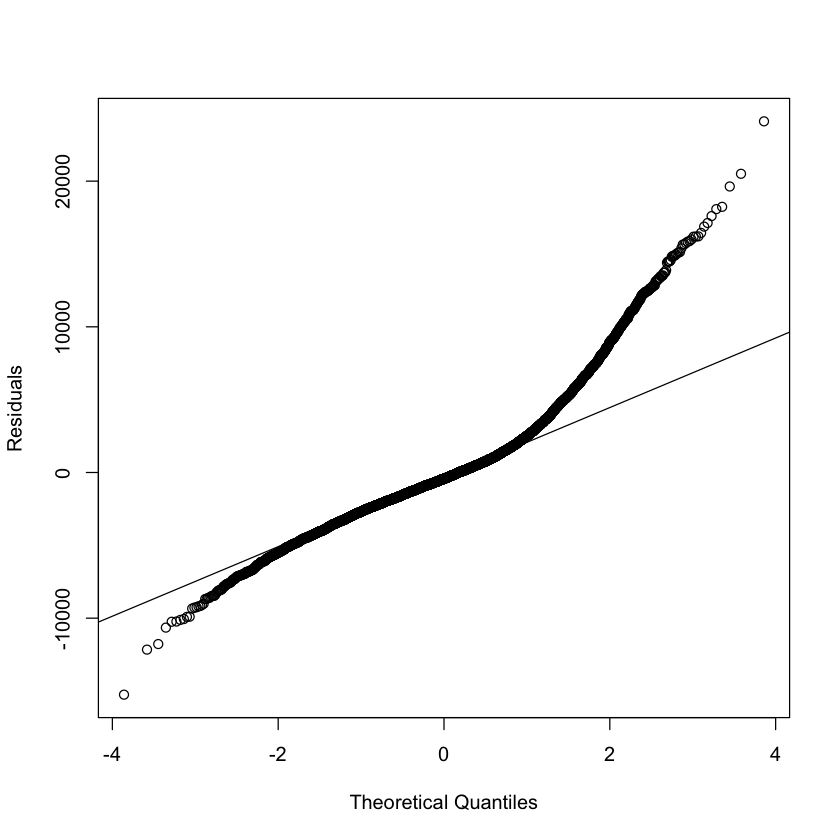

In [62]:
# check the distribution of residuals
qqnorm(residuals(m2),ylab="Residuals",main="") 
qqline(residuals(m2))

## 4. By Regression Tree

In [164]:
set.seed(222)
trainingRowIndex <- sample(1:nrow(data_merged_shuffled), 0.8*nrow(data_merged_shuffled)) 
trainingData_2 <- data_merged_shuffled[trainingRowIndex, ] 
testData_2 <- data_merged_shuffled[-trainingRowIndex, ]

In [165]:
r1 <- rpart(Salary~. , data = trainingData_2)

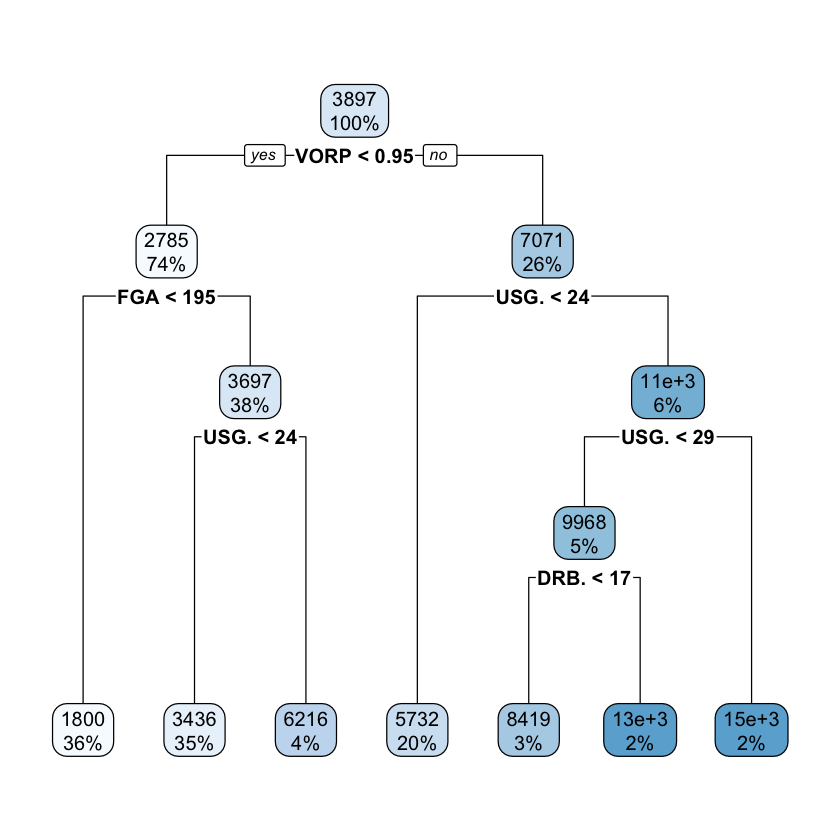

In [166]:
rpart.plot(r1)

In [183]:
summary(r1)

Call:
rpart(formula = Salary ~ ., data = trainingData_2)
  n= 8806 

          CP nsplit rel error    xerror       xstd
1 0.17337198      0 1.0000000 1.0001303 0.02829951
2 0.07156471      1 0.8266280 0.8361415 0.02339255
3 0.03269018      2 0.7550633 0.7705448 0.02163919
4 0.01529963      3 0.7223731 0.7380394 0.02092294
5 0.01241680      4 0.7070735 0.7307825 0.02078466
6 0.01043916      5 0.6946567 0.7165518 0.02008017
7 0.01000000      6 0.6842175 0.7143375 0.02006874

Variable importance
VORP  BPM   WS   MP  OWS USG.  DWS  PTS  FGA   FG X2PA   FT  X2P DRB. TRB.  DRB 
  15   10   10   10    9    8    8    6    6    5    4    2    2    1    1    1 
 TRB ORB.  ORB 
   1    1    1 

Node number 1: 8806 observations,    complexity param=0.173372
  mean=3896.755, MSE=2.035716e+07 
  left son=2 (6522 obs) right son=3 (2284 obs)
  Primary splits:
      VORP < 0.95   to the left,  improve=0.1733720, (0 missing)
      FG   < 291.5  to the left,  improve=0.1667713, (0 missing)
      PTS  < 9

In [167]:
p.r1 <- predict(r1,testData_2)

In [168]:
actuals_preds_2 <- data.frame(cbind(actuals=testData$Salary, predicteds=p.r1))
head(actuals_preds_2)

,actuals,predicteds
7740,7308,3436.220
5882,2826,1800.042
2159,14889,5731.802
2513,8270,5731.802
2417,409,3436.220
5806,1487,3436.220


In [170]:
# calculate MSE and RMSE
sum4 = 0
for(i in 1:nrow(actuals_preds_2)){
    sum4 = sum4 + (actuals_preds_2[i,1] - actuals_preds_2[i,2]) * (actuals_preds_2[i,1] - actuals_preds_2[i,2])
}
mse4 = sum4 / nrow(actuals_preds_2)
rmse4 <- sqrt(mse4)
mse4
rmse4

[1] 13823995

[1] 3718.063

In [181]:
r2 <- rpart(Salary ~. -TRB. -WS -WS.48 -BPM -TRB -AST -STL -BLK -TOV -X3PAr -FTr -AST.
         -BLK. -DWS -VORP -X3P -X3PA -X2P -X2PA -eFG. -FT -FTA -PTS , data = trainingData_2)
p.r2 <- predict(r2,testData_2)
actuals_preds_3 <- data.frame(cbind(actuals=testData$Salary, predicteds=p.r2))
head(actuals_preds_3)

,actuals,predicteds
7740,7308,5174.263
5882,2826,1800.184
2159,14889,7368.210
2513,8270,5174.263
2417,409,3763.196
5806,1487,3763.196


In [182]:
# calculate MSE and RMSE
sum5 = 0
for(i in 1:nrow(actuals_preds_3)){
    sum5 = sum5 + (actuals_preds_3[i,1] - actuals_preds_3[i,2]) * (actuals_preds_3[i,1] - actuals_preds_3[i,2])
}
mse5 = sum5 / nrow(actuals_preds_3)
rmse5 <- sqrt(mse5)
mse5
rmse5

[1] 13696647

[1] 3700.898